 Prepare the general libraries.

In [1]:
# libraries
library(community)
library(ggplot2)

 Prepare the path.

In [2]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- "../../../../results/method_comparison/compare_algorithms/vanGalen/community/"

print("path_in")
print(path_in)

[1] "path_in"
[1] "../../../../results/method_comparison/compare_algorithms/vanGalen/community/"


Load data.

In [3]:
suppressWarnings(load(paste0(path_in,"/interactions.RData")))

Load functions for visualization.

In [4]:
load("visualization_functions.RData")

## Parameters

In [5]:
# threshold for log2FC of the weights
threshold_log2FC <- interactions$thresholds$threshold_log2FC

idx_up <- interactions$anno_interactions$log2FC_weights > threshold_log2FC
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<= threshold_log2FC
idx_down <- interactions$anno_interactions$log2FC_weights < -threshold_log2FC
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

In [6]:
# extract cell types
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "HSPC" "Mono" "DC"   "Ery"  "T"    "B"   


In [7]:
# define broad type of interactions by cell types
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]

interaction_cell_types <- unique(paste(interactions$anno_interactions$sending_cell_type
                                ,interactions$anno_interactions$receiving_cell_type
                                ,sep = " to "))

interaction_type <- sapply(interaction_cell_types
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type))

interaction_type_by_ID <- sapply(interactions$anno_interactions$interaction_ID
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type_by_ID))

colors_interaction_type <- c("engages HSPC" = "magenta"
                             ,"among immune cells" = "deepskyblue"
                             ,"engages Ery" = "lightgoldenrod"
                            )
print(colors_interaction_type)

 Named chr [1:36] "engages HSPC" "engages HSPC" "engages HSPC" ...
 - attr(*, "names")= chr [1:36] "HSPC to HSPC" "HSPC to Mono" "HSPC to DC" "HSPC to Ery" ...
NULL
 Named chr [1:62064] "engages HSPC" "engages HSPC" "engages HSPC" ...
 - attr(*, "names")= chr [1:62064] "HSPC:ACTR2_HSPC:ADRB2" "HSPC:ACTR2_HSPC:LDLR" "HSPC:ADM_HSPC:ADRB2" "HSPC:ADM_HSPC:CALCRL" ...
NULL
      engages HSPC among immune cells        engages Ery 
         "magenta"      "deepskyblue"   "lightgoldenrod" 


## Visualization: all good quality interactions

### Mean weight vs mean number 

In [8]:
library(ggrepel) # to add text labels on the mean weigth vs number of interactions plot

In [9]:
# claclulate mean weight of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
mean_weights_goodInteractions <- mean_weights(interactions)

print(str(mean_weights_goodInteractions))

List of 2
 $ AML    :'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: num [1:6] 0.05038 0.01797 0.02472 0.00705 0.00544 ...
  ..$ Mono: num [1:6] 0.01989 0.0532 0.01503 0.00445 0.00374 ...
  ..$ DC  : num [1:6] 0.02434 0.01448 0.03211 0.00203 0.00313 ...
  ..$ Ery : num [1:6] 0.00864 0.0044 0.00212 0.00769 0.00479 ...
  ..$ T   : num [1:6] 0.00673 0.00383 0.0038 0.00573 0.00414 ...
  ..$ B   : num [1:6] 0.01112 0.01161 0.00647 0.00457 0.00328 ...
 $ healthy:'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: num [1:6] 0.000897 0.002807 0.001482 0.003653 0.003559 ...
  ..$ Mono: num [1:6] 0.00266 0.01252 0.00595 0.01122 0.02337 ...
  ..$ DC  : num [1:6] 0.00151 0.00562 0.00321 0.00667 0.0097 ...
  ..$ Ery : num [1:6] 0.00422 0.01201 0.00743 0.02008 0.02083 ...
  ..$ T   : num [1:6] 0.00451 0.02448 0.01236 0.02339 0.07882 ...
  ..$ B   : num [1:6] 0.00362 0.01748 0.00946 0.02006 0.04132 ...
NULL


In [10]:
# claclulate number of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
number_goodInteractions <- number_interactions(interactions)

print(str(number_goodInteractions))

List of 2
 $ AML    :'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: int [1:6] 239 248 257 207 136 211
  ..$ Mono: int [1:6] 305 404 361 340 247 337
  ..$ DC  : int [1:6] 305 398 360 322 230 315
  ..$ Ery : int [1:6] 224 298 263 300 185 266
  ..$ T   : int [1:6] 173 251 199 212 166 215
  ..$ B   : int [1:6] 230 303 276 263 190 267
 $ healthy:'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: int [1:6] 238 248 256 232 139 217
  ..$ Mono: int [1:6] 305 409 364 398 252 350
  ..$ DC  : int [1:6] 305 398 362 372 235 324
  ..$ Ery : int [1:6] 266 408 358 454 271 370
  ..$ T   : int [1:6] 173 257 215 260 174 221
  ..$ B   : int [1:6] 244 327 296 350 211 294
NULL


In [11]:
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]
grepl(paste(immune_cell_types, collapse="|"), "B cell")

[1] TRUE

'data.frame':	36 obs. of  4 variables:
 $ mean_interaction_weight: num  0.05038 0.01797 0.02472 0.00705 0.00544 ...
 $ number_of_interactions : int  239 248 257 207 136 211 305 404 361 340 ...
 $ interaction_ID         : chr  "HSPC to HSPC" "Mono to HSPC" "DC to HSPC" "Ery to HSPC" ...
 $ interaction_type       : chr  "engages HSPC" "engages HSPC" "engages HSPC" "engages Ery" ...
NULL
'data.frame':	36 obs. of  4 variables:
 $ mean_interaction_weight: num  0.000897 0.002807 0.001482 0.003653 0.003559 ...
 $ number_of_interactions : int  238 248 256 232 139 217 305 409 364 398 ...
 $ interaction_ID         : chr  "HSPC to HSPC" "Mono to HSPC" "DC to HSPC" "Ery to HSPC" ...
 $ interaction_type       : chr  "engages HSPC" "engages HSPC" "engages HSPC" "engages Ery" ...
NULL


Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 29 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[[1]]

[[2]]


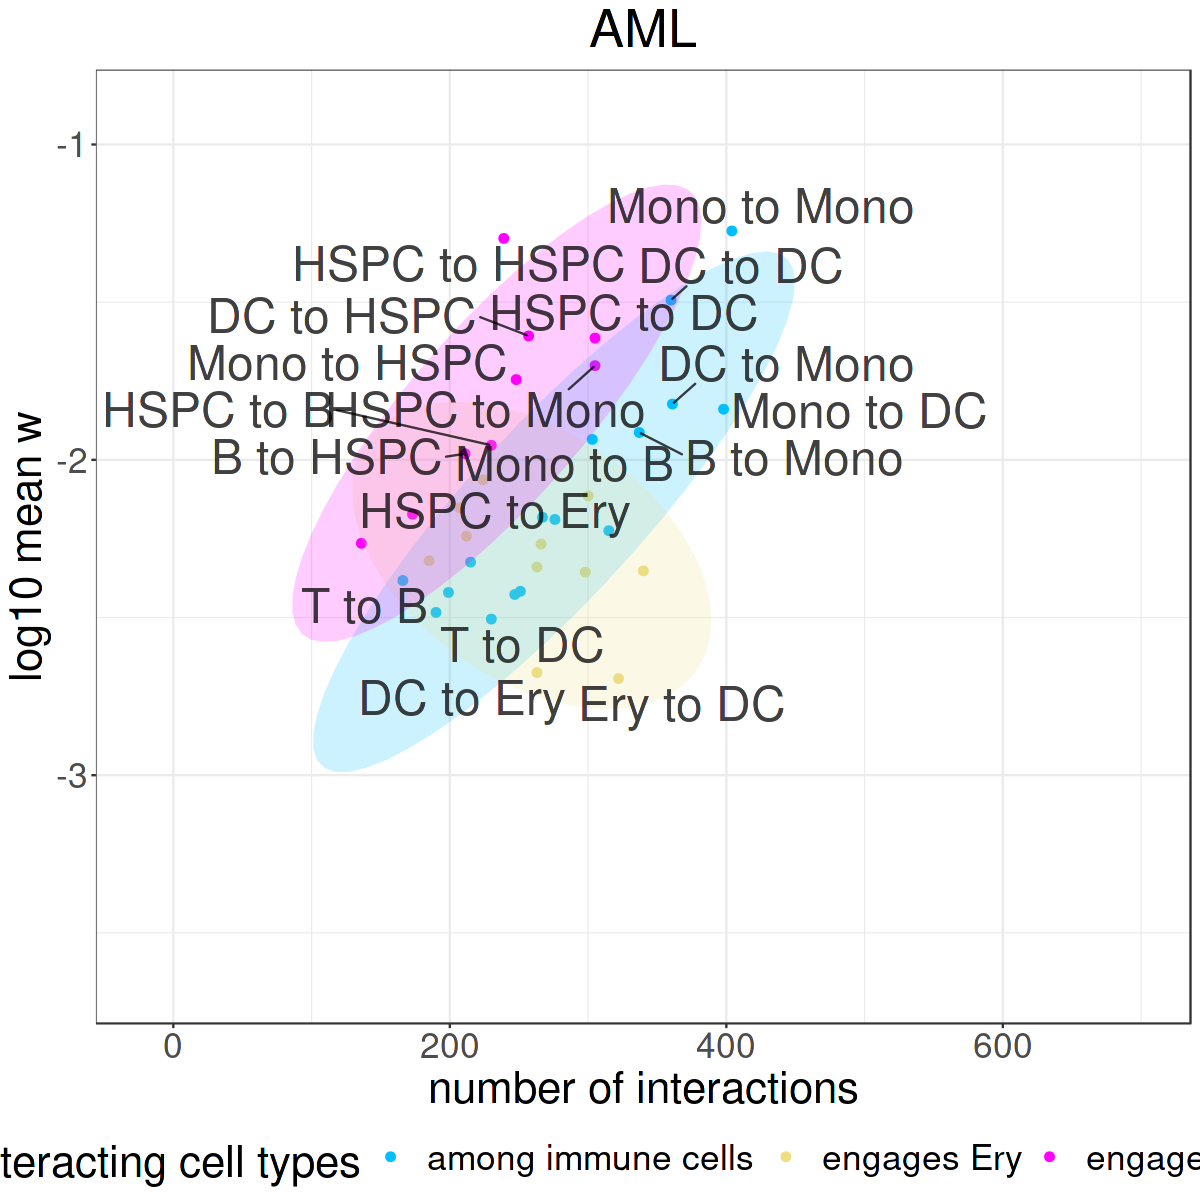

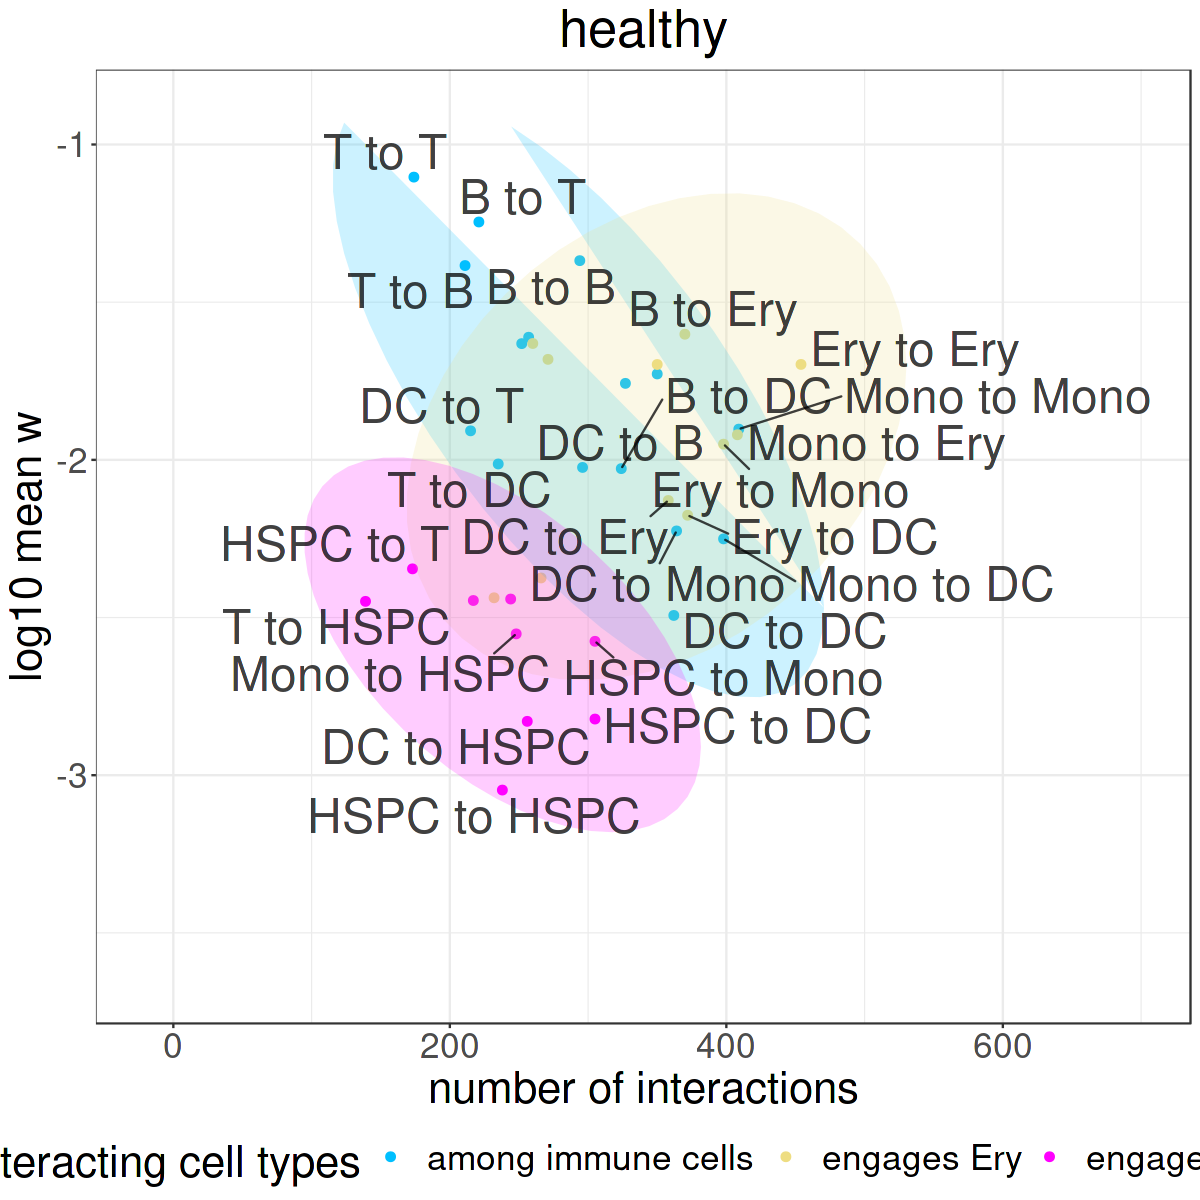

In [12]:
# plot mumber of interactions vs mean interaction weights per cell type to cell type interaction
options(repr.plot.width = 10
        ,repr.plot.height = 10)

ylim <- c(-3.65, -0.9)
xlim <- c(-20, 700)

plot_nrInt_vs_meanW_perCellType(interactions
                               ,interaction_type = interaction_type
                               ,colors = colors_interaction_type
                               ,ylim = ylim
                               ,label_font_size = 10)

### Ligand-receptor families

## Visualization of differential interactions

### Voclano

In [13]:
print("downregulated:")
print(sum(idx_down & idx_sign))

print("upregulated:")
print(sum(idx_up & idx_sign))

[1] "downregulated:"
[1] 4503
[1] "upregulated:"
[1] 402


In [14]:
# REMOVE THIS AFTER RECOMPILING THE PACKAGE!!!

# recalculate log2FC of w
interactions$anno_interactions$log2FC_weights <- log2FC(x = interactions$weights,anno_samples = interactions$anno_samples)

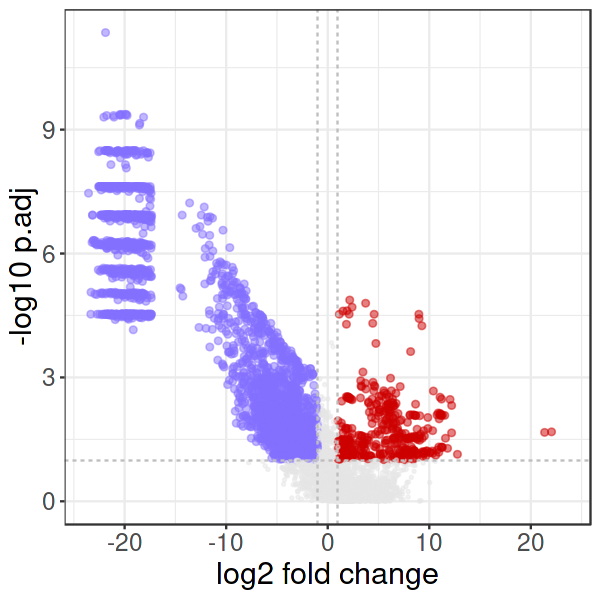

In [15]:
# volcano plot
options(repr.plot.height = 5
       ,repr.plot.width = 5)
    
plot_vulcano(interactions)

### Heatmap top differential

In [16]:
library(ComplexHeatmap) # to plot heatmaps
library(circlize) # for gragient colors

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

Thi

In [17]:
# heatmap of interactions weight of top differential interactions
# top adjusted p value
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:300]
idx_topdown <- interactions$anno_interactions$log2FC_weights < -1 & idx_topsign
idx_topdown20 <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topdown][1:8]

# all upregulated interactions
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:500]
idx_topup <- interactions$anno_interactions$log2FC_weights > 1 & idx_topsign
idx_topup5 <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topup][1:7]

# top 20 downregulated interactions

idx <- idx_topup5 | idx_topdown20
print(sum(idx))

[1] 15


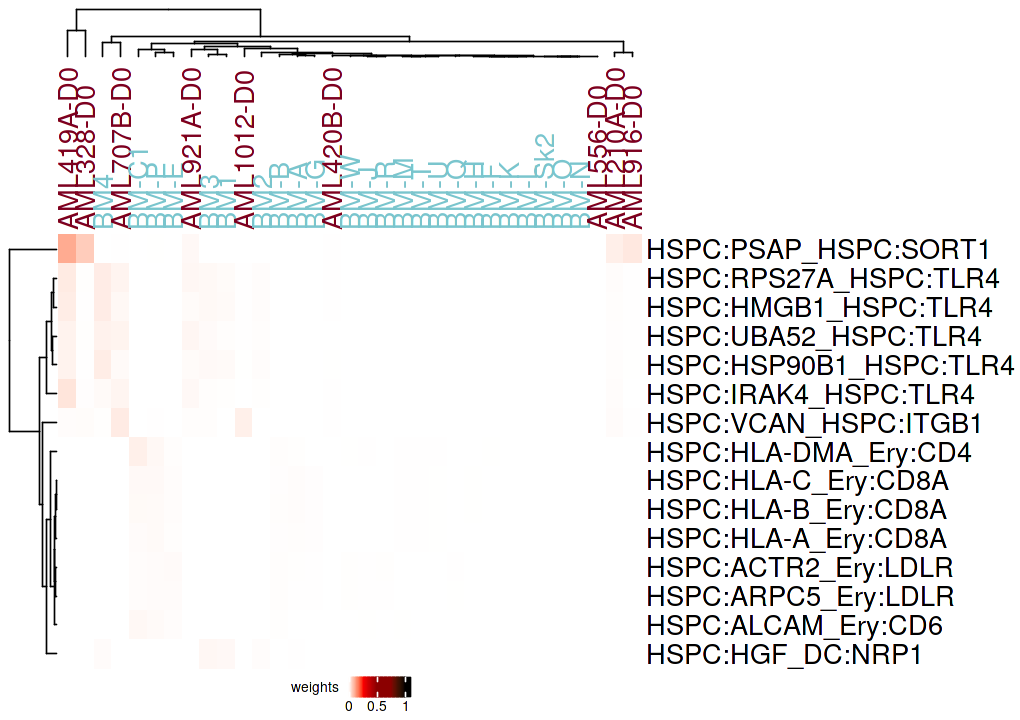

In [18]:
set.seed(3)
options(repr.plot.height = 6
       ,repr.plot.width = 8.5
       )
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights"
            ,row_font_size = 16
            ,column_font_size = 16
            )

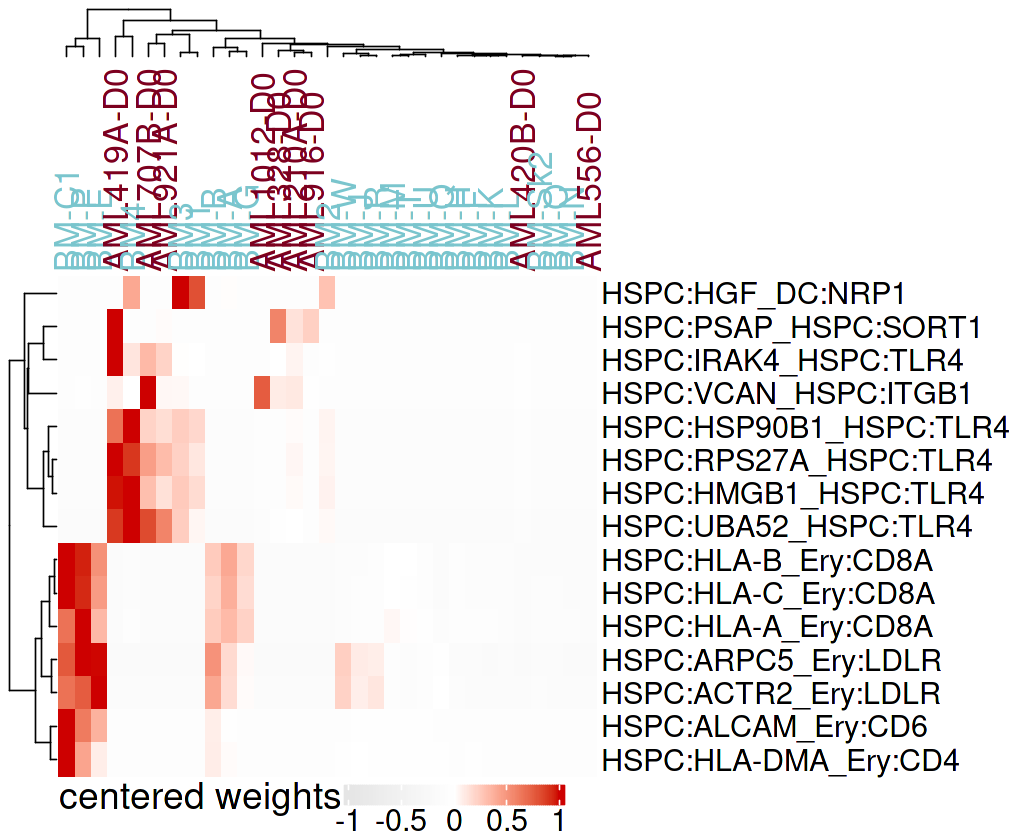

In [19]:
# centred Heatmap
set.seed(3)
options(repr.plot.height = 7
       ,repr.plot.width = 8.5
       )
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights"
            ,row_font_size =18
            ,column_font_size = 20
             ,centered = TRUE
             ,color_values = circlize::colorRamp2(c(-1,0,1), c("gray90","white", "red3"))
             ,legend_title_font_size = 22
             ,labels_font_size = 18
            )

### Barplot with cell type of differential interactions

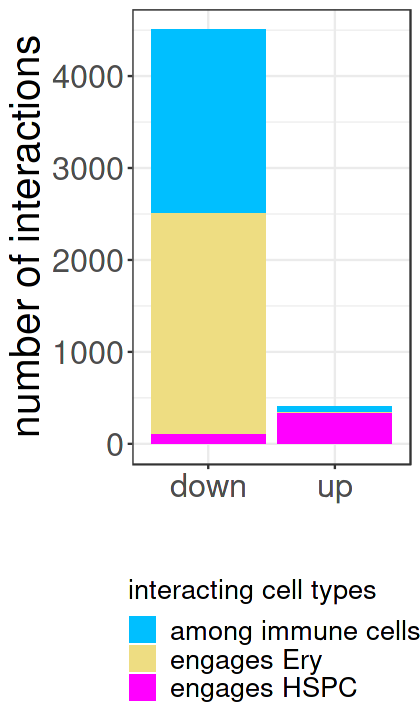

In [20]:
# stacked bar interaction classes: up- and downregulated
options(repr.plot.width = 3.5
       ,repr.plot.height = 6)

plot_stacked_bar(interactions
                ,idx_up = idx_up
                ,idx_down = idx_down
                ,idx_sign = idx_sign
                ,interaction_type = interaction_type_by_ID
                ,colors = colors_interaction_type
                ,font_size = 24
                )+
theme(legend.text = element_text(size=16)
      ,legend.title = element_text(size=16)
     ,legend.position = "bottom"
     ,legend.direction = "vertical")

### Network plots

In [21]:
library(igraph) # to plot circus plots


Attaching package: ‘igraph’


The following object is masked from ‘package:circlize’:

    degree


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




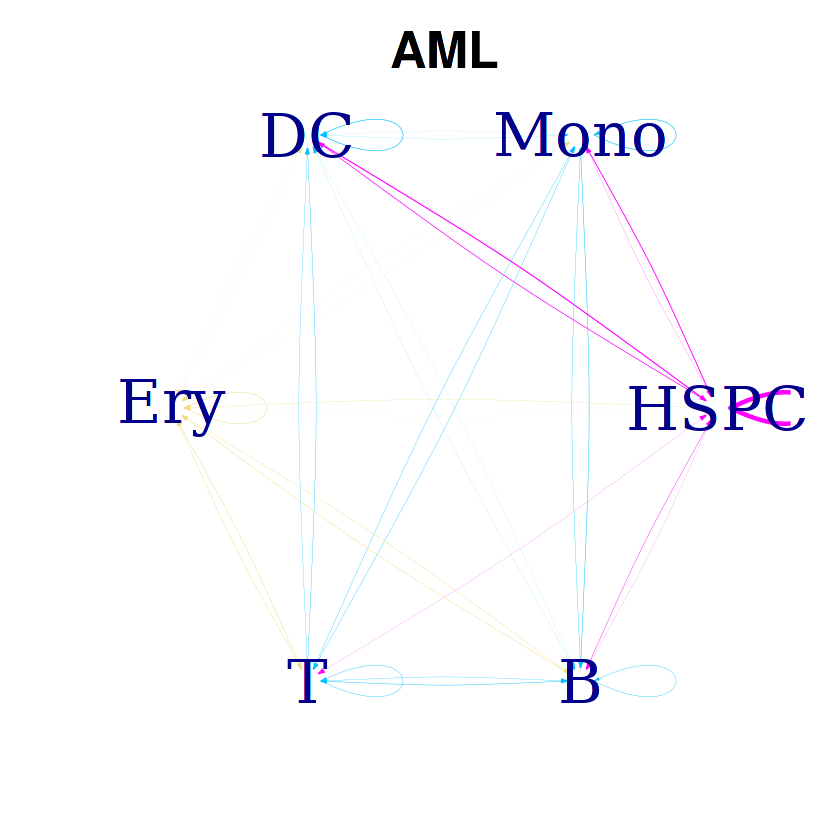

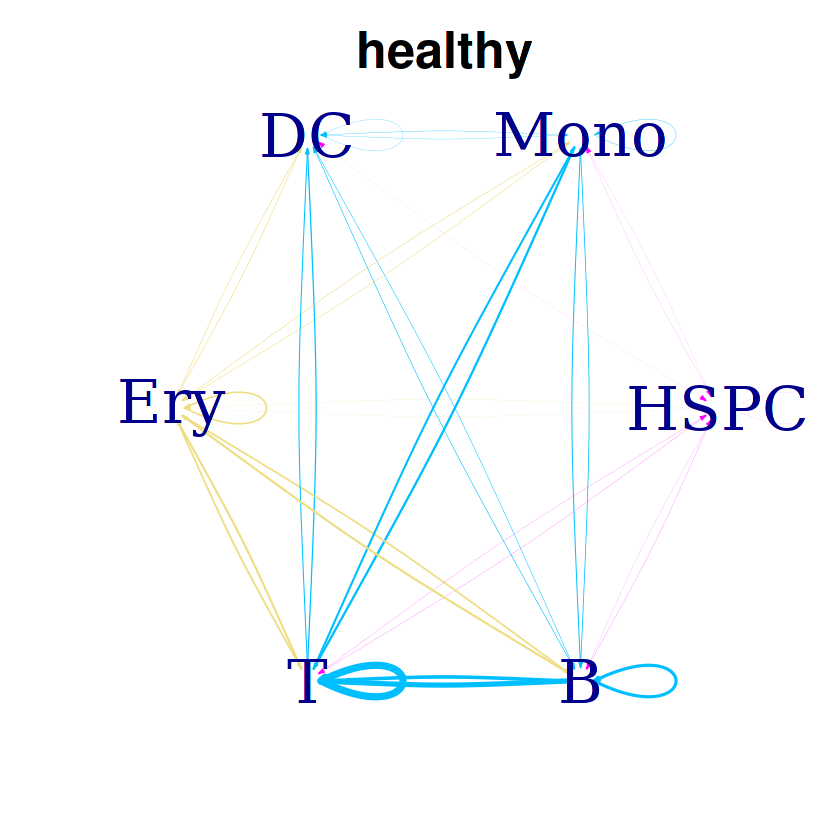

In [22]:
options(repr.plot.width = 7
       ,repr.plot.height = 7)

colors <- colors_interaction_type[interaction_type]
names(colors) <- names(interaction_type)

plor_celltype_network(interactions
                     ,edge.color = colors
                     ,title_cex = 2.5
                     ,vertex.label.cex = 3
                     ,edge.arrow.size = 0.2
                     ,verbose = FALSE
                     )

### Ligand-receptor families

## Visualization of individual components

<img src="components_scheme.png">

### Forest plots

In [23]:
library(gridExtra) 

In [24]:
# indices

idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

idx_up <- interactions$anno_interactions$log2FC_weights >1
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<=1
idx_down <- interactions$anno_interactions$log2FC_weights < -1

idx_only_rho_s <- interactions$anno_interactions$components_affected_s == "rho" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_rho_r <- interactions$anno_interactions$components_affected_r == "rho" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_phi_s <- interactions$anno_interactions$components_affected_s == "phi" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_phi_r <- interactions$anno_interactions$components_affected_r == "phi" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_p_s <- interactions$anno_interactions$components_affected_s == "p" & interactions$anno_interactions$nr_comp_affected_b == 1 
idx_only_p_r <- interactions$anno_interactions$components_affected_r == "p" & interactions$anno_interactions$nr_comp_affected_b == 1 

idx_nrComp_s_none <- interactions$anno_interactions$nr_comp_affected_s == 0
idx_nrComp_s_one <- interactions$anno_interactions$nr_comp_affected_s == 1
idx_nrComp_s_several <- interactions$anno_interactions$nr_comp_affected_s >1

idx_nrComp_r_none <- interactions$anno_interactions$nr_comp_affected_r == 0
idx_nrComp_r_one <- interactions$anno_interactions$nr_comp_affected_r == 1
idx_nrComp_r_several <- interactions$anno_interactions$nr_comp_affected_r >1

idx_no_change <- interactions$anno_interactions$interaction_category == "no_change"
idx_simple_decrease <- interactions$anno_interactions$interaction_category == "simple_decrease"
idx_simple_increase <- interactions$anno_interactions$interaction_category == "simple_increase"
idx_concordant_decrease <- interactions$anno_interactions$interaction_category == "concordant_decrease"
idx_concordant_increase <- interactions$anno_interactions$interaction_category == "concordant_increase"
idx_insufficient_comp <- interactions$anno_interactions$interaction_category == "insufficient_compensation"
idx_sufficient_comp <- interactions$anno_interactions$interaction_category == "sufficient_compensation"

In [25]:
# ordered IDs

# no change
ID_order_no_change <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                     idx_no_change
                                                                                   ,]
                                                   )$interaction_ID

# simpe down: rho_s -> phi_s -> p_s -> rho_r -> phi_r -> p_r
ID_order_rho_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_rho_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_phi_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_s_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_decrease &
                                                                                   idx_only_p_s 
                                                                                   ,]
                                                   )$interaction_ID

ID_order_rho_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_rho_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_decrease &
                                                                                     idx_only_phi_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_r_only_down <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_decrease &
                                                                                   idx_only_p_r 
                                                                                   ,]
                                                   )$interaction_ID

# simpe up: rho_s -> phi_s -> p_s -> rho_r -> phi_r -> p_r
ID_order_rho_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_rho_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_phi_s 
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_s_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_increase &
                                                                                   idx_only_p_s 
                                                                                   ,]
                                                   )$interaction_ID

ID_order_rho_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_rho_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_phi_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                     idx_simple_increase &
                                                                                     idx_only_phi_r
                                                                                    ,]
                                                   )$interaction_ID

ID_order_p_r_only_up <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_simple_increase &
                                                                                   idx_only_p_r 
                                                                                   ,]
                                                   )$interaction_ID

# concordant down: sender -> receiver -> both
ID_order_concordantDown_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_one_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_one_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_several_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantDown_b_several_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_decrease &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

# concordant up: sender -> receiver -> both
ID_order_concordantUp_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_one_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_one_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_one &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_several_one <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_one
                                                                                   ,]
                                                   )$interaction_ID

ID_order_concordantUp_b_several_several <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_concordant_increase &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_several
                                                                                   ,]
                                                   )$interaction_ID

# insufficiend compensation down: sender -> receiver -> both
ID_order_insuffDown_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffDown_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffDown_b <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_down & 
                                                                                   idx_insufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

# insufficiend compensation up: sender -> receiver -> both
ID_order_insuffUp_s <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffUp_r <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_insuffUp_b <- order_interactions_for_forests(interactions$anno_interactions[idx_sign & 
                                                                                   idx_up & 
                                                                                   idx_insufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

# sufficient compensation: sender -> receiver -> both
ID_order_suffComp_s <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   idx_nrComp_s_several &
                                                                                   idx_nrComp_r_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_suffComp_r <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   idx_nrComp_r_several &
                                                                                   idx_nrComp_s_none
                                                                                   ,]
                                                   )$interaction_ID

ID_order_suffComp_b <- order_interactions_for_forests(interactions$anno_interactions[!idx_sign & 
                                                                                     idx_good &
                                                                                   idx_sufficient_comp &
                                                                                   (idx_nrComp_s_one | idx_nrComp_s_several) &
                                                                                   (idx_nrComp_r_one | idx_nrComp_r_several)
                                                                                   ,]
                                                   )$interaction_ID

In [26]:
IDs_all <- as.character(c(ID_order_no_change
                          ,ID_order_rho_s_only_down
                          ,ID_order_phi_s_only_down
                          ,ID_order_p_s_only_down
                          ,ID_order_rho_r_only_down
                          ,ID_order_phi_r_only_down
                          ,ID_order_p_r_only_down
                          ,ID_order_rho_s_only_up
                          ,ID_order_phi_s_only_up
                          ,ID_order_p_s_only_up
                          ,ID_order_rho_r_only_up
                          ,ID_order_phi_r_only_up
                          ,ID_order_p_r_only_up
                          ,ID_order_concordantDown_s
                          ,ID_order_concordantDown_r
                          ,ID_order_concordantDown_b_one_one
                          ,ID_order_concordantDown_b_one_several
                          ,ID_order_concordantDown_b_several_one
                          ,ID_order_concordantDown_b_several_several
                          ,ID_order_concordantUp_s
                          ,ID_order_concordantUp_r
                          ,ID_order_concordantUp_b_one_one
                          ,ID_order_concordantUp_b_one_several
                          ,ID_order_concordantUp_b_several_one
                          ,ID_order_concordantUp_b_several_several
                          ,ID_order_insuffDown_s
                          ,ID_order_insuffDown_r
                          ,ID_order_insuffDown_b
                          ,ID_order_insuffUp_s
                          ,ID_order_insuffUp_r
                          ,ID_order_insuffUp_b
                          ,ID_order_suffComp_s
                          ,ID_order_suffComp_r
                          ,ID_order_suffComp_b
                         )
                       )

# revert
IDs_all <- IDs_all[length(IDs_all):1]

print(str(IDs_all))

 chr [1:6092] "Mono:MS4A1_B:CD82" "Mono:MS4A1_B:CD53" "Mono:IL4R_B:IL2RG" ...
NULL


#### Split by category

In [27]:
rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
of_interest <- interactions$anno_interactions[IDs_all,]

idx_log2FC_w_min <- of_interest$log2FC_weights == min(of_interest$log2FC_weights)
ID_log2FC_w_min <- of_interest$interaction_ID[idx_log2FC_w_min][1]

idx_log2FC_w_max <- of_interest$log2FC_weights == max(of_interest$log2FC_weights)
ID_log2FC_w_max <- of_interest$interaction_ID[idx_log2FC_w_max][1]


idx_log2FC_rho_s_min <- of_interest$log2FC_rho_s == min(of_interest$log2FC_rho_s)
ID_log2FC_rho_s_min <- of_interest$interaction_ID[idx_log2FC_rho_s_min][1]

idx_log2FC_rho_s_max <- of_interest$log2FC_rho_s == max(of_interest$log2FC_rho_s)
ID_log2FC_rho_s_max <- of_interest$interaction_ID[idx_log2FC_rho_s_max][1]


idx_log2FC_phi_s_min <- of_interest$log2FC_phi_s_l == min(of_interest$log2FC_phi_s_l)
ID_log2FC_phi_s_min <- of_interest$interaction_ID[idx_log2FC_phi_s_min][1]

idx_log2FC_phi_s_max <- of_interest$log2FC_phi_s_l == max(of_interest$log2FC_phi_s_l)
ID_log2FC_phi_s_max <- of_interest$interaction_ID[idx_log2FC_phi_s_max][1]


idx_log2FC_p_s_min <- of_interest$log2FC_p_s_l == min(of_interest$log2FC_p_s_l)
ID_log2FC_p_s_min <- of_interest$interaction_ID[idx_log2FC_p_s_min][1]

idx_log2FC_p_s_max <- of_interest$log2FC_p_s_l == max(of_interest$log2FC_p_s_l)
ID_log2FC_p_s_max <- of_interest$interaction_ID[idx_log2FC_p_s_max][1]


idx_log2FC_rho_r_min <- of_interest$log2FC_rho_r == min(of_interest$log2FC_rho_r)
ID_log2FC_rho_r_min <- of_interest$interaction_ID[idx_log2FC_rho_r_min][1]

idx_log2FC_rho_r_max <- of_interest$log2FC_rho_r == max(of_interest$log2FC_rho_r)
ID_log2FC_rho_r_max <- of_interest$interaction_ID[idx_log2FC_rho_r_max][1]


idx_log2FC_phi_r_min <- of_interest$log2FC_phi_r_r == min(of_interest$log2FC_phi_r_r)
ID_log2FC_phi_r_min <- of_interest$interaction_ID[idx_log2FC_phi_r_min][1]

idx_log2FC_phi_r_max <- of_interest$log2FC_phi_r_r == max(of_interest$log2FC_phi_r_r)
ID_log2FC_phi_r_max <- of_interest$interaction_ID[idx_log2FC_phi_r_max][1]


idx_log2FC_p_r_min <- of_interest$log2FC_p_r_r == min(of_interest$log2FC_p_r_r)
ID_log2FC_p_r_min <- of_interest$interaction_ID[idx_log2FC_p_r_min][1]

idx_log2FC_p_r_max <- of_interest$log2FC_p_r_r == max(of_interest$log2FC_p_r_r)
ID_log2FC_p_r_max <- of_interest$interaction_ID[idx_log2FC_p_r_max][1]

rm(of_interest)

IDs_lim <- c(ID_log2FC_w_min
            ,ID_log2FC_w_max

            ,ID_log2FC_rho_s_min
            ,ID_log2FC_rho_s_max

            ,ID_log2FC_phi_s_min
            ,ID_log2FC_phi_s_max

            ,ID_log2FC_p_s_min
            ,ID_log2FC_p_s_max

            ,ID_log2FC_rho_r_min
            ,ID_log2FC_rho_r_max

            ,ID_log2FC_phi_r_min
            ,ID_log2FC_phi_r_max

            ,ID_log2FC_p_r_min
            ,ID_log2FC_p_r_max
            ) 

IDs_lim <- IDs_lim[!duplicated(IDs_lim)]

print(str(IDs_lim))

 chr [1:12] "T:TGFB1_T:TGFBR3" "HSPC:CD55_HSPC:ADGRE2" "T:IL16_Mono:CD9" ...
NULL


[1] Mono:PIK3R1_Mono:EPN1     Mono:PIK3R1_Mono:CBL     
[3] Mono:LILRB2_Mono:SIGLEC10 Mono:CD33_Mono:SIGLEC10  
[5] Mono:CALM1_Mono:HMMR      Mono:C1QB_Mono:C1QBP     
24 Levels: DC:CD55_HSPC:ADGRE2 < DC:TGFB1_Ery:LPP < ... < T:TGFB1_T:TGFBR3
[1]  0.9213294  0.6803988  0.7087350  0.8885615 -0.2239471  0.1105962


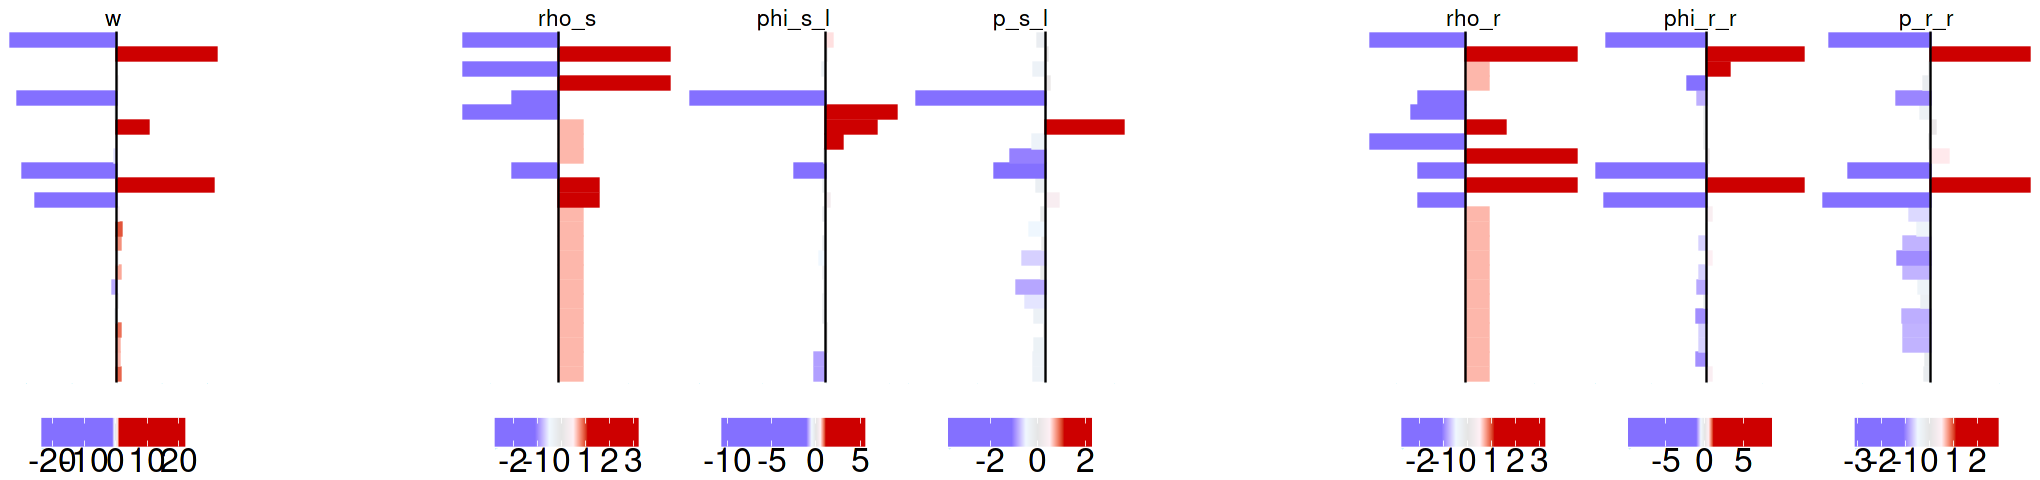

In [28]:
IDs <- as.character(c(ID_order_no_change
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 4)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Mono:PIK3R1_B:EPN1 Mono:ITGA4_B:CD81  Mono:ICAM1_B:MSN   Mono:GNAI2_B:S1PR4
[5] Mono:CD2_B:CD53    Mono:CCR1_B:MBP   
369 Levels: B:B2M_Mono:CD1C < B:CALM1_Mono:HMMR < ... < T:VIM_Mono:CD44
[1] -1.612871 -1.649648 -1.751613 -2.776518 -1.206581 -1.920510


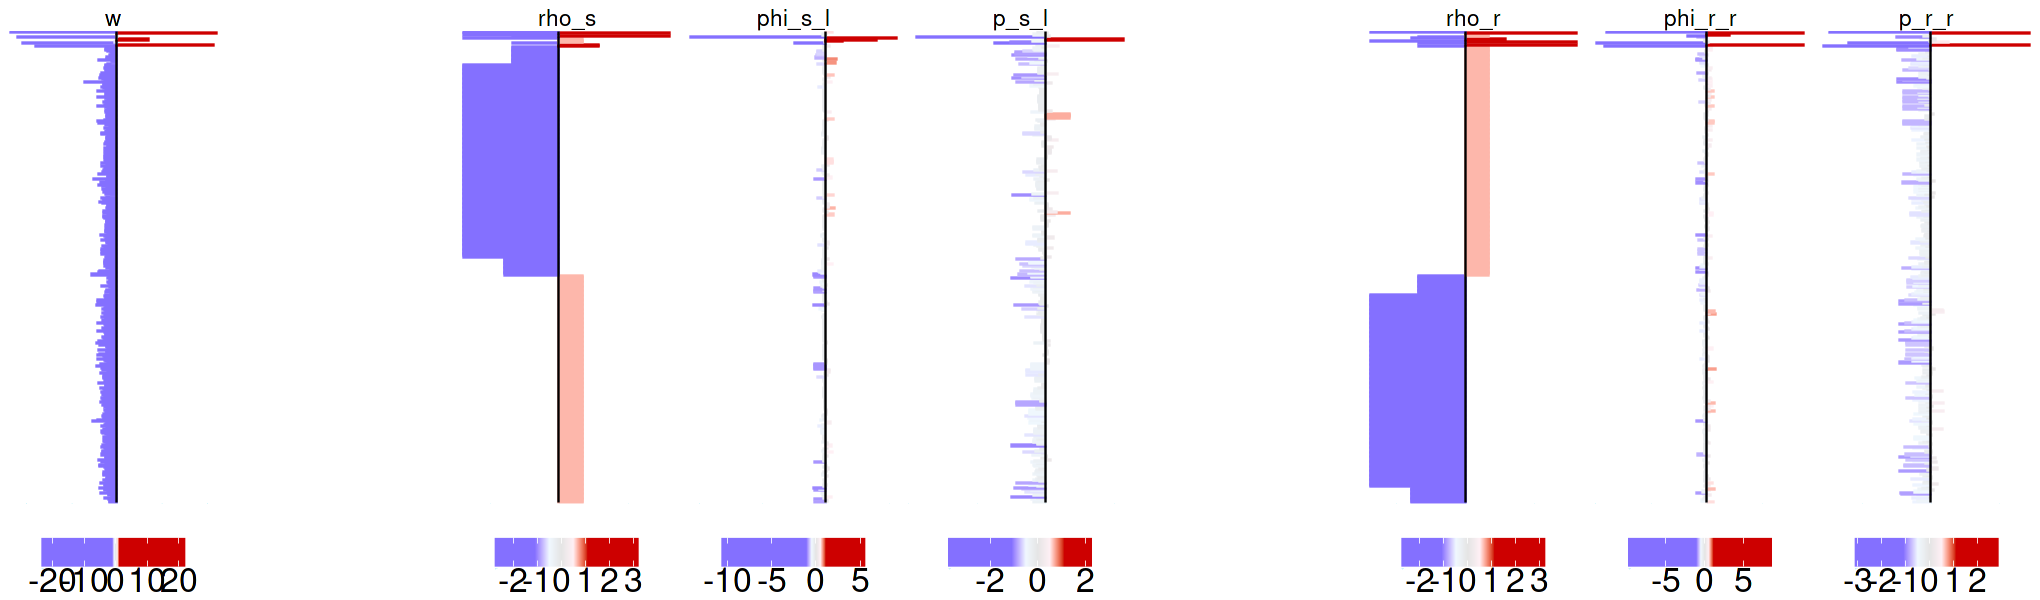

In [29]:
IDs <- as.character(c(ID_order_rho_s_only_down
                         ,ID_order_phi_s_only_down
                         ,ID_order_p_s_only_down
                         ,ID_order_rho_r_only_down
                         ,ID_order_phi_r_only_down
                         ,ID_order_p_r_only_down
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 5#3
       )

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Mono:UBC_HSPC:TLR4    Mono:UBB_HSPC:TLR4    Mono:UBA52_HSPC:TLR4 
[4] Mono:RPS27A_HSPC:TLR4 Mono:HMGB1_HSPC:CD163 Mono:CD36_HSPC:TLR4  
20 Levels: DC:CD55_HSPC:ADGRE2 < DC:TGFB1_Ery:LPP < ... < T:TGFB1_T:TGFBR3
[1] 1.417402 1.227515 1.061074 1.043566 6.892806 1.244454


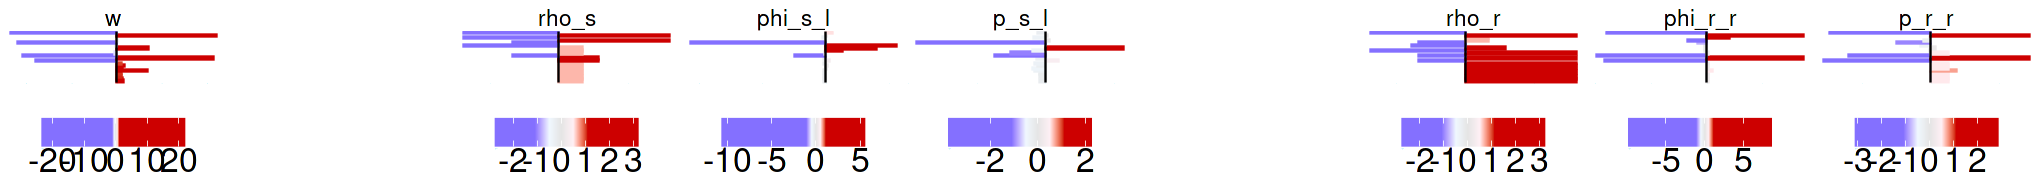

In [30]:
IDs <- as.character(c(ID_order_rho_s_only_up
                          ,ID_order_phi_s_only_up
                          ,ID_order_p_s_only_up
                          ,ID_order_rho_r_only_up
                          ,ID_order_phi_r_only_up
                          ,ID_order_p_r_only_up
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Mono:NAALADL1_Mono:CD96 Mono:CD81_Mono:KIT      Mono:ALCAM_Mono:CD6    
[4] Mono:IGFBP2_B:IGF1      Mono:HGF_B:SDC1         Mono:SPARC_Ery:ENG     
2687 Levels: B:ACTR2_B:LDLR < B:ACTR2_Ery:LDLR < ... < T:VIM_T:CD44
[1] -17.573281  -9.929615  -3.102817  -6.125472 -18.172962 -19.421992


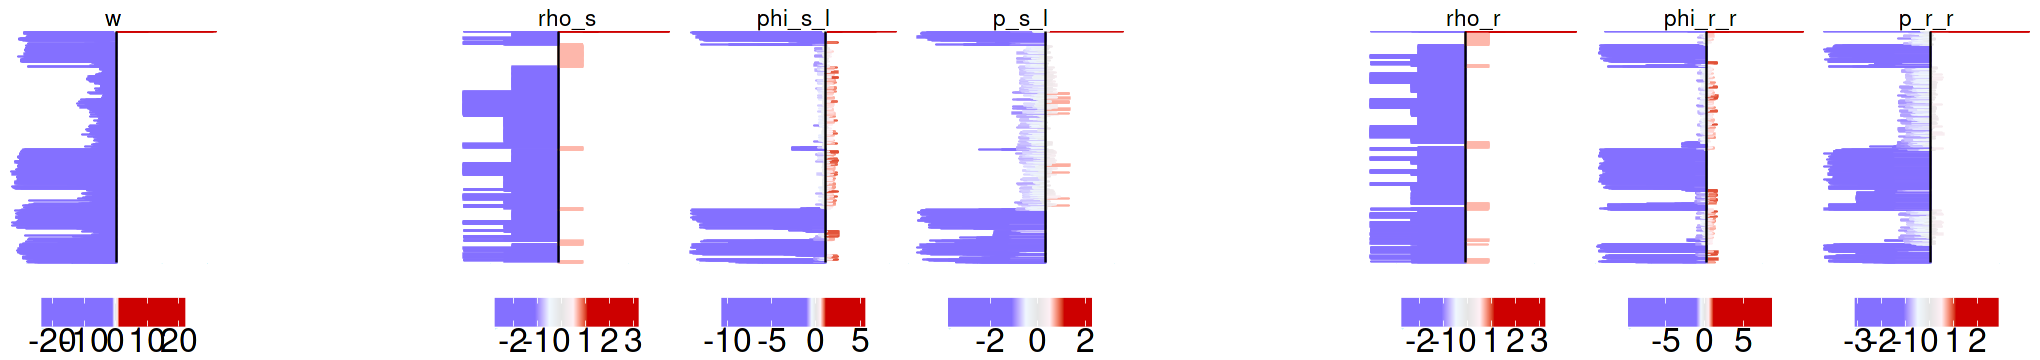

In [31]:
IDs <- as.character(c(ID_order_concordantDown_s
                          ,ID_order_concordantDown_r
                          ,ID_order_concordantDown_b_one_one
                          ,ID_order_concordantDown_b_one_several
                          ,ID_order_concordantDown_b_several_one
                          ,ID_order_concordantDown_b_several_several
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 3)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] HSPC:TGFB1_HSPC:TGFBR2  HSPC:TNFSF10_HSPC:RIPK1 Mono:CXCL14_DC:CXCR4   
[4] Mono:ANGPT1_DC:ITGB1    Mono:CXCL14_HSPC:CXCR4  Mono:ANGPT1_HSPC:ITGB1 
277 Levels: DC:ACTR2_HSPC:LDLR < ... < T:TGFB1_T:TGFBR3
[1] 12.773258 11.797509  2.768115  7.059388  2.251539  8.762096


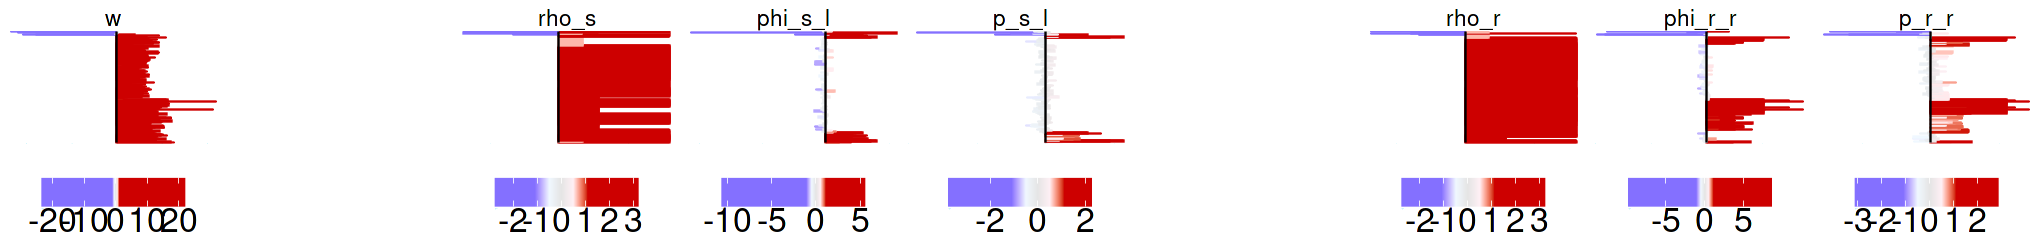

In [32]:
IDs <- as.character(c(ID_order_concordantUp_s
                          ,ID_order_concordantUp_r
                          ,ID_order_concordantUp_b_one_one
                          ,ID_order_concordantUp_b_one_several
                          ,ID_order_concordantUp_b_several_one
                          ,ID_order_concordantUp_b_several_several
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 2)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] Mono:VEGFA_Ery:VCAN   Mono:NAALADL1_B:CD96  Mono:CD320_T:TMEM167A
[4] Mono:LCK_T:CD8A       Mono:LCK_T:CD8B       Mono:PLGRKT_DC:PLAUR 
1472 Levels: B:ADAM10_DC:CD44 < B:ADAM10_DC:IL6R < ... < T:ZYX_Ery:ENG
[1] -3.779571 -9.850497 -9.690606 -3.218869 -3.018458 -1.807544


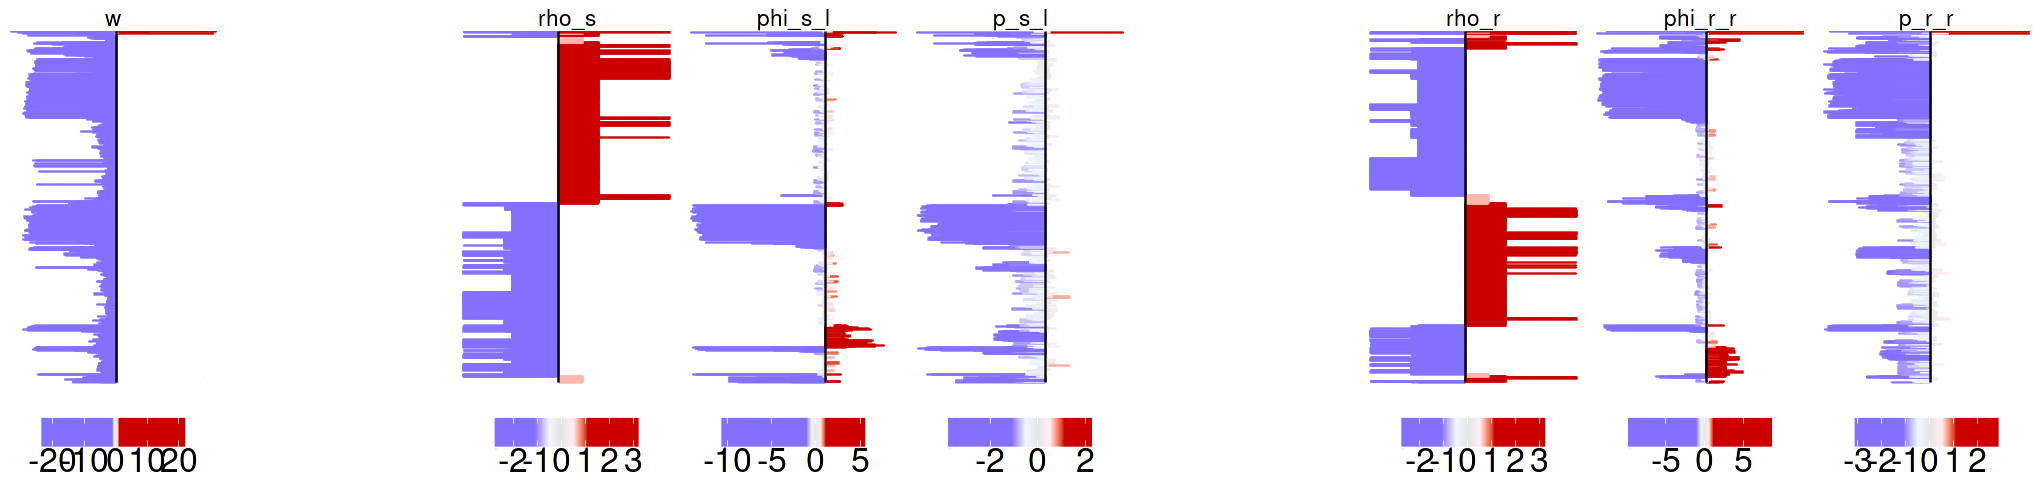

In [33]:
IDs <- as.character(c(ID_order_insuffDown_s
                          ,ID_order_insuffDown_r
                          ,ID_order_insuffDown_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 4)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

[1] B:ITGA6_Mono:CD9     B:MFNG_HSPC:NOTCH2   B:ITGA6_HSPC:CD82   
[4] B:IFNG_HSPC:IFNGR1   T:LILRB2_HSPC:IFNGR1 B:PSAP_HSPC:SORT1   
89 Levels: B:ACTR2_HSPC:LDLR < B:ARPC5_HSPC:LDLR < ... < T:TGFB1_T:TGFBR3
[1] 1.073465 1.041456 1.349002 1.195838 2.614955 4.304009


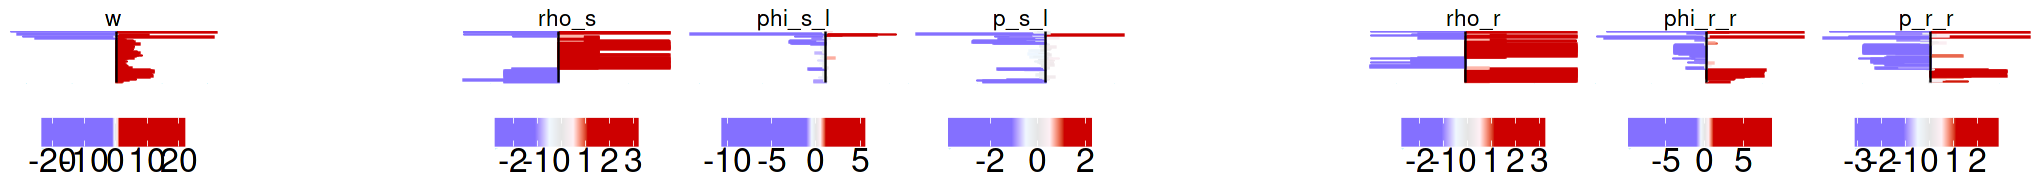

In [34]:
IDs <- as.character(c(ID_order_insuffUp_s
                          ,ID_order_insuffUp_r
                          ,ID_order_insuffUp_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

In [35]:
length(ID_order_suffComp_b)

[1] 1138

[1] Mono:MS4A1_B:CD82  Mono:MS4A1_B:CD53  Mono:IL4R_B:IL2RG  Mono:FCER2_B:ITGB2
[5] Mono:CD22_B:PTPRC  Mono:MS4A1_T:CD53 
1238 Levels: B:ADAM10_HSPC:CD44 < B:ADAM10_HSPC:IL6R < ... < T:VIM_HSPC:CD44
[1]  0.682811305  0.340801118  0.015541992 -0.210894641 -0.243738860
[6]  0.005730262


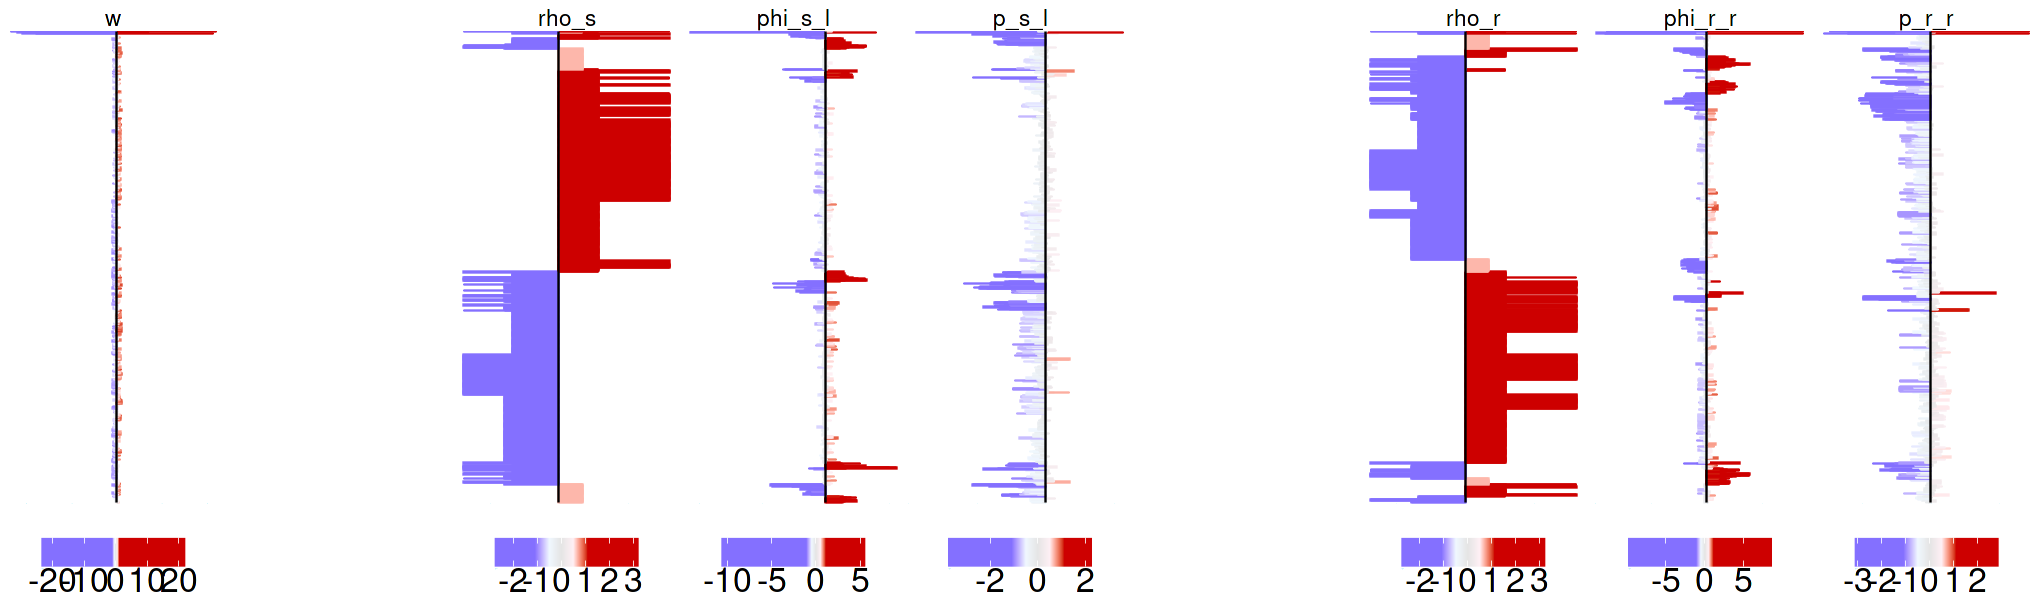

In [36]:
IDs <- as.character(c(ID_order_suffComp_s
                          ,ID_order_suffComp_r
                          ,ID_order_suffComp_b
                     ))
IDs <- c(IDs_lim[!(IDs_lim %in% IDs)]
        ,IDs)

# revert
IDs <- IDs[length(IDs):1]

options(repr.plot.width = 17
       ,repr.plot.height = 5)

rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
my_anno_interactions <- interactions$anno_interactions[IDs,]
my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                             ,ordered = TRUE
                                                    )

print(head(my_anno_interactions$interaction_ID))
print(head(my_anno_interactions$log2FC_weights))


plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                 ,my_anno_interactions = my_anno_interactions
                 ,keep_order = TRUE
                 ,threshold = 1
                 ,legend_title_size = 0
                 ,legend_text_size = 20
                )

In [37]:
paste0('For the communication analysis, the threshold_celltype_size and',
  ' the threshold_nr_active_cells were both set to ',interactions$thresholds$threshold_nr_active_cells,
  ' cells, the threshold_expr  was set to ',interactions$thresholds$threshold_expr ,
  ' The total number of interactions were ',nrow(interactions$anno_interactions), 
  '. For the QC, the  threshold_log10_cum_weight, ',
  'the threshold_frac_samples_per_condition, and the threshold_log10meanexpr_per_condition were set to ',
  interactions$thresholds$threshold_log10_cum_weight, ', ',  interactions$thresholds$threshold_frac_samples_per_condition,
  ', ', interactions$thresholds$threshold_log10_meanexpr_per_condition,
  ' respectively. The total number of good quality interactions was ',sum(idx_good),
  '. The differential communication analysis was run on good quality interactions using t-test on log2-',
  'transformed weights and FDR adjustment. The threshold_log2FC was set to ', interactions$thresholds$threshold_log2FC ,
  ' and the threshold_fdr was set to ',interactions$thresholds$threshold_fdr ,
  ', which yielded ',sum(idx_down & idx_sign),' downregulated and ',sum(idx_up & idx_sign) ,' upregulated interactions.')

[1] "For the communication analysis, the threshold_celltype_size and the threshold_nr_active_cells were both set to 0 cells, the threshold_expr  was set to 0.1 The total number of interactions were 62064. For the QC, the  threshold_log10_cum_weight, the threshold_frac_samples_per_condition, and the threshold_log10meanexpr_per_condition were set to 0.01, 0.6, 0.02 respectively. The total number of good quality interactions was 10555. The differential communication analysis was run on good quality interactions using t-test on log2-transformed weights and FDR adjustment. The threshold_log2FC was set to 1 and the threshold_fdr was set to 0.1, which yielded 4503 downregulated and 402 upregulated interactions."

In [38]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gridExtra_2.3         igraph_1.4.2          circlize_0.4.15      
[4] ComplexHeatmap_2.10.0 ggrepel_0.9.2         ggplot2_3.4.2        
[7] community_1.3.9      

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7    